## 1. Import Required Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [28]:
df = pd.read_excel('Assessment.xlsx').drop(columns=["Unnamed: 9", "Unnamed: 10", "Steps:"])
df.head()

,weekend_date,key,channel,brand,category,sub_category,SerailNum,quantity,Train_Validation
0,2022-06-04,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,56,Train
1,2022-06-11,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,122,Train
2,2022-06-18,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,102,Train
3,2022-06-25,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,128,Train
4,2022-07-02,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,97,Train


In [30]:
train_df = (df[df["Train_Validation"] == "Train"])
train_df.head()

,weekend_date,key,channel,brand,category,sub_category,SerailNum,quantity,Train_Validation
0,2022-06-04,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,56,Train
1,2022-06-11,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,122,Train
2,2022-06-18,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,102,Train
3,2022-06-25,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,128,Train
4,2022-07-02,1_B1,Channel1,B1,Cat2,Sub-Cat2,1,97,Train


In [32]:
train_df.shape

(526, 9)

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 552
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   weekend_date      526 non-null    datetime64[ns]
 1   key               526 non-null    object        
 2   channel           526 non-null    object        
 3   brand             526 non-null    object        
 4   category          526 non-null    object        
 5   sub_category      526 non-null    object        
 6   SerailNum         526 non-null    int64         
 7   quantity          526 non-null    int64         
 8   Train_Validation  526 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 41.1+ KB


In [58]:
train_df.isnull().sum()

weekend_date        0
key                 0
channel             0
brand               0
category            0
sub_category        0
SerailNum           0
quantity            0
Train_Validation    0
dtype: int64

In [60]:
train_df.describe()

,weekend_date,SerailNum,quantity
count,526,526.000000,526.000000
mean,2023-07-12 13:52:14.600760576,3.062738,529.737643
min,2022-05-28 00:00:00,1.000000,3.000000
25%,2023-02-11 00:00:00,2.000000,125.500000
50%,2023-07-22 00:00:00,3.000000,247.000000
75%,2023-12-23 00:00:00,4.000000,584.500000
max,2024-05-25 00:00:00,5.000000,8051.000000
std,NaN,1.417529,876.101803


In [62]:
print("Columns in train_df:", train_df.columns.tolist())

Columns in train_df: ['weekend_date', 'key', 'channel', 'brand', 'category', 'sub_category', 'SerailNum', 'quantity', 'Train_Validation']


In [87]:
#Convert Date Column to Datetime
train_df.loc[:, 'weekend_date'] = pd.to_datetime(train_df['weekend_date'])

In [64]:
print(train_df['weekend_date'].head())

0   2022-06-04
1   2022-06-11
2   2022-06-18
3   2022-06-25
4   2022-07-02
Name: weekend_date, dtype: datetime64[ns]


In [70]:
#Check Unique Values
for col in ['channel', 'brand', 'category', 'sub_category', 'SerailNum']:
    print(f"{col}: {df[col].nunique()} unique values")

channel: 3 unique values
brand: 2 unique values
category: 3 unique values
sub_category: 4 unique values
SerailNum: 5 unique values


## Visualization

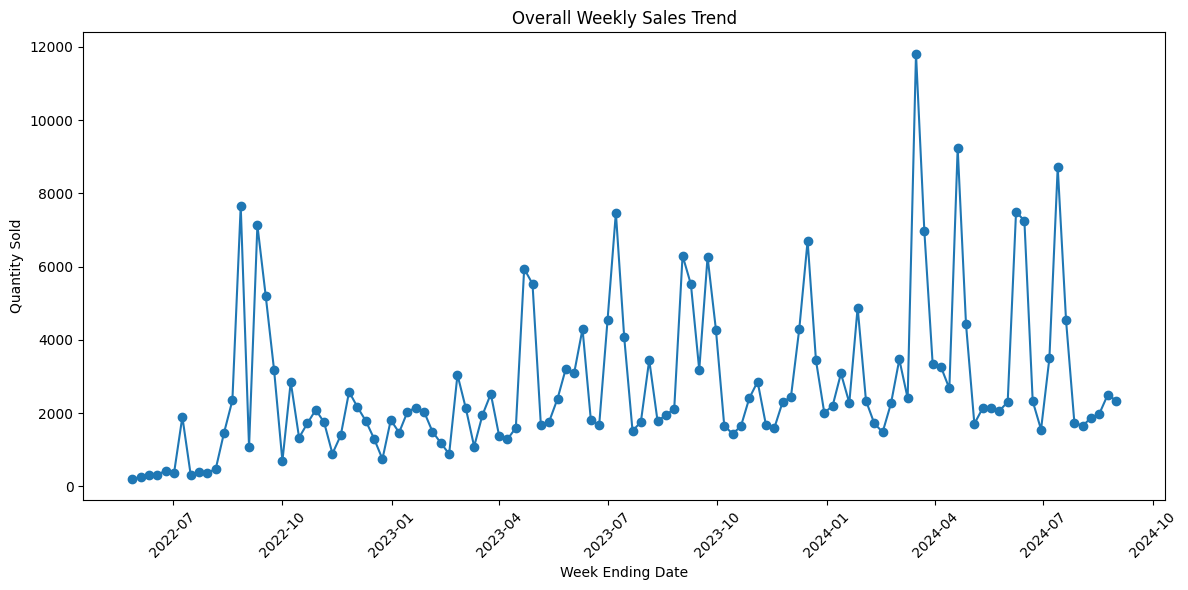

In [73]:
# Plot Weekly Sales Trend (Overall)
weekly_sales = df.groupby('weekend_date')['quantity'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(weekly_sales['weekend_date'], weekly_sales['quantity'], marker='o')
plt.title('Overall Weekly Sales Trend')
plt.xlabel('Week Ending Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Sivashini\AppData\Local\Temp\ipykernel_34464\3365973567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='quantity', data=monthly_sales, palette='viridis')


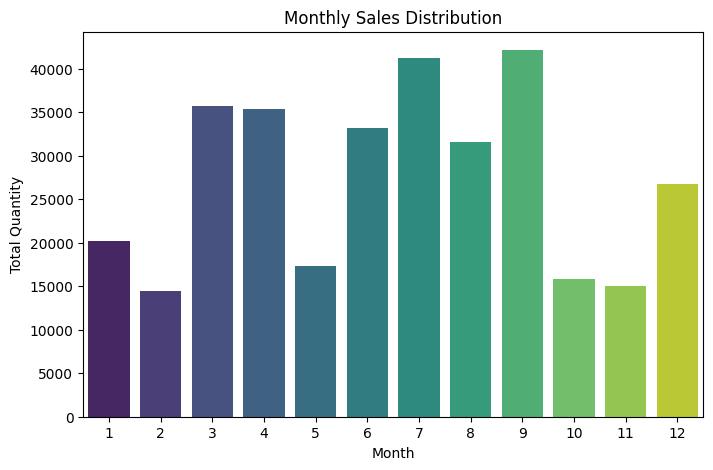

In [75]:
#Seasonal Trend by Month
df['month'] = df['weekend_date'].dt.month
monthly_sales = df.groupby('month')['quantity'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='month', y='quantity', data=monthly_sales, palette='viridis')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

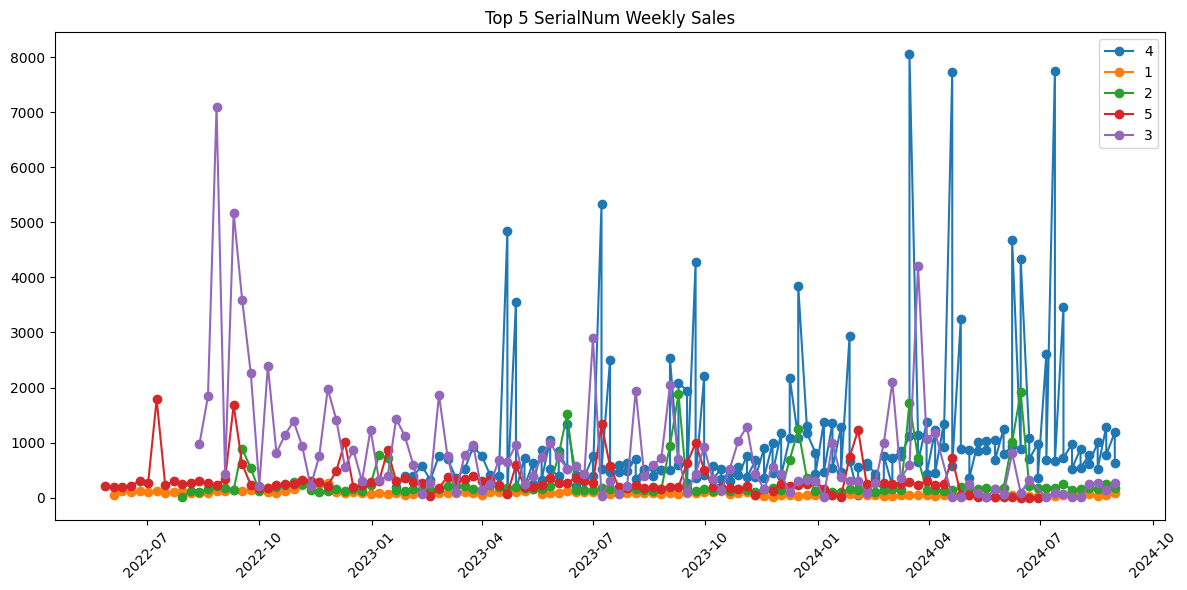

In [81]:
# Sales Distribution per SerialNum
top_serials = df['SerailNum'].value_counts().head(5).index
plt.figure(figsize=(12,6))
for serial in top_serials:
    temp = df[df['SerailNum'] == serial]
    plt.plot(temp['weekend_date'], temp['quantity'], marker='o', label=serial)
plt.title('Top 5 SerialNum Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

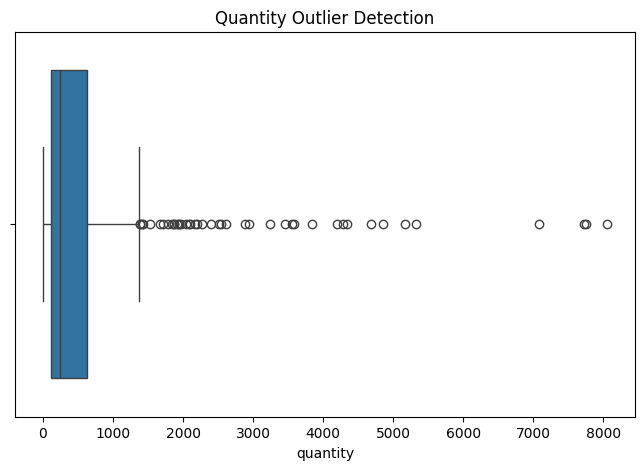

In [83]:
#Outlier Detection (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['quantity'])
plt.title('Quantity Outlier Detection')
plt.show()